# Matplotlib & Seaborn Project

## COVID-19: EDA & Visualization
This data is extracted for a single day presenting COVID-19 data all over the world including confirmed, deaths, recovered cases

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Loading & Importing Data

In [2]:
df = pd.read_csv('covid_19_data.csv',parse_dates=True,index_col=0)

In [3]:
df

,State,Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-29,NaN,Afghanistan,1939,60,252
2020-04-29,NaN,Albania,766,30,455
2020-04-29,NaN,Algeria,3848,444,1702
2020-04-29,NaN,Andorra,743,42,423
2020-04-29,NaN,Angola,27,2,7
...,...,...,...,...,...
2020-04-29,Wyoming,US,545,7,0
2020-04-29,Xinjiang,Mainland China,76,3,73
2020-04-29,Yukon,Canada,11,0,0


### Inspecting DataFrame Properties

In [4]:
df.head()

,State,Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-29,NaN,Afghanistan,1939,60,252
2020-04-29,NaN,Albania,766,30,455
2020-04-29,NaN,Algeria,3848,444,1702
2020-04-29,NaN,Andorra,743,42,423
2020-04-29,NaN,Angola,27,2,7


In [5]:
df.tail()

,State,Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-29,Wyoming,US,545,7,0
2020-04-29,Xinjiang,Mainland China,76,3,73
2020-04-29,Yukon,Canada,11,0,0
2020-04-29,Yunnan,Mainland China,185,2,181
2020-04-29,Zhejiang,Mainland China,1268,1,1263


In [6]:
df.shape

(321, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321 entries, 2020-04-29 to 2020-04-29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      140 non-null    object
 1   Region     321 non-null    object
 2   Confirmed  321 non-null    int64 
 3   Deaths     321 non-null    int64 
 4   Recovered  321 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.0+ KB


In [8]:
df.count()

State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [9]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [10]:
df.isnull()

,State,Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-29,True,False,False,False,False
2020-04-29,True,False,False,False,False
2020-04-29,True,False,False,False,False
2020-04-29,True,False,False,False,False
2020-04-29,True,False,False,False,False
...,...,...,...,...,...
2020-04-29,False,False,False,False,False
2020-04-29,False,False,False,False,False
2020-04-29,False,False,False,False,False


In [11]:
df.isnull().sum()

State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

==========

## Project Exercises

#### Q1 - Show the number of confirmed, death and recovered cases in each region

In [12]:
df.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [13]:
df.groupby('Region')[['Confirmed','Recovered']].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


#### Q2 - In which region, the maximum number of confirmed cases were recorded?

In [14]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False)

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

#### Q3 - In which region, the minimum number of deaths cases where recorded?

In [15]:
df.groupby('Region').Deaths.sum().sort_values(ascending=True)

Region
Laos              0
Mongolia          0
Mozambique        0
Cambodia          0
Fiji              0
              ...  
France        24121
Spain         24275
UK            26166
Italy         27682
US            60967
Name: Deaths, Length: 187, dtype: int64

#### Q4 - How many confirmed, deaths and recovered cases were reported from India till April 2020?

In [16]:
df[df.Region =='India']

,State,Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-29,NaN,India,33062,1079,8437


#### Q5 - Find the number of confirmed, deaths and recovered cases were reported from USA till April 2020, and try to visualize the data of death vs confirmed cases

In [17]:
df[df.Region =='US'].head()

,State,Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-29,Alabama,US,6912,256,0
2020-04-29,Alaska,US,355,9,0
2020-04-29,Arizona,US,7209,308,0
2020-04-29,Arkansas,US,3193,57,0
2020-04-29,California,US,48747,1946,0


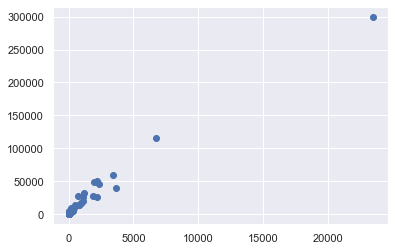

In [18]:
plt.scatter(df[df.Region =='US']['Deaths'],df[df.Region =='US']['Confirmed'])

#### Q6 - Visualize the 'US' confirmed cases by state

In [19]:
df[df.Region =='US'].sort_values(by= ['Confirmed'],ascending= True)

,State,Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-29,Recovered,US,0,0,120720
2020-04-29,Northern Mariana Islands,US,14,2,0
2020-04-29,Diamond Princess cruise ship,US,49,0,0
2020-04-29,Virgin Islands,US,57,4,0
2020-04-29,Grand Princess,US,103,3,0
2020-04-29,Guam,US,141,5,0
2020-04-29,Alaska,US,355,9,0
2020-04-29,Montana,US,451,16,0
2020-04-29,Wyoming,US,545,7,0


<BarContainer object of 58 artists>

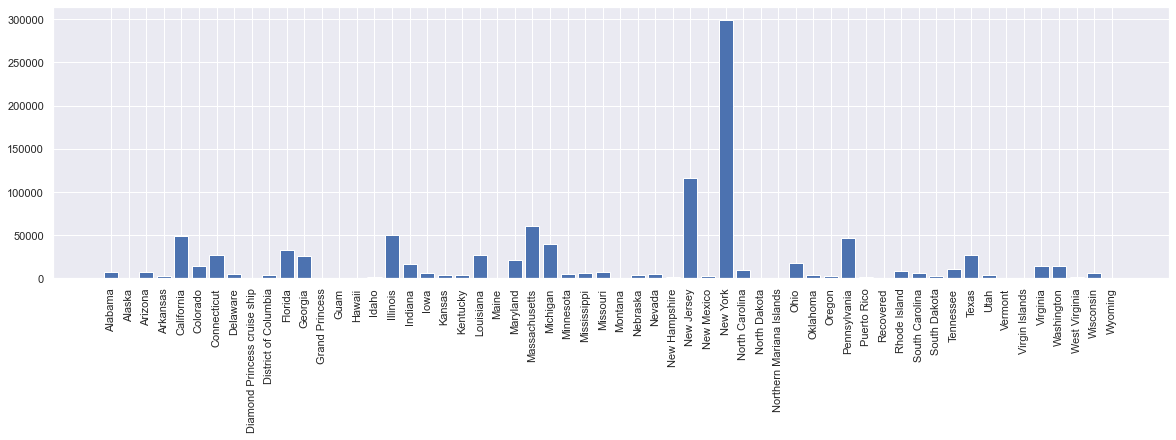

In [20]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(df[df['Region'] =='US']['State'], df[df['Region'] =='US']['Confirmed'])

==========

# GOOD LUCK!